In [75]:
#This Analysis is for renewable and non-renewable share of energy production.


In [76]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plot

In [77]:
df=pd.read_csv(r'C:/Users/Sumit/OneDrive/Documents/GITHUB IBM DA/India-Energy-Analytics-Model/POSOCO_data.csv')
print(df)

      yyyymmdd  NR: DemandMet  NR: PeakShortage  NR: EnergyMet  NR: HydroGen  \
0     20130102        36462.0            2049.0          766.0         99.00   
1     20130103            NaN               NaN            NaN           NaN   
2     20130104            NaN               NaN            NaN           NaN   
3     20130105            NaN               NaN            NaN           NaN   
4     20130106            NaN               NaN            NaN           NaN   
...        ...            ...               ...            ...           ...   
4218  20240721        81558.0             296.0         1884.0        395.99   
4219  20240722        80534.0             175.0         1901.0        396.35   
4220  20240723        82312.0             195.0         1880.0        395.38   
4221  20240724        80656.0               0.0         1826.0        387.36   
4222  20240725        81215.0             370.0         1835.0        382.98   

      NR: WindGen  NR: SolarGen  NR: En

In [78]:

df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')

# Set 'yyyymmdd' as index
df.set_index('yyyymmdd', inplace=True)

# Resample data to monthly frequency, summing up the values
monthly_data = df.resample('M').sum()

# Group by year and sum the monthly values to get yearly data
yearly_data = monthly_data.resample('Y').sum()

# Reset index to view as DataFrame
yearly_data.reset_index(inplace=True)

print(yearly_data)




     yyyymmdd  NR: DemandMet  NR: PeakShortage  NR: EnergyMet  NR: HydroGen  \
0  2013-12-31      9608209.0          589100.0      217394.00      53614.00   
1  2014-12-31     13810822.0          828184.0      308496.00      66679.00   
2  2015-12-31     14203803.0          716449.0      314230.00      72581.00   
3  2016-12-31     15183071.0          423834.0      339437.00      73724.00   
4  2017-12-31     16411182.0          395539.0      360112.00      76958.00   
5  2018-12-31     16861702.0          318166.0      375041.00      70000.00   
6  2019-12-31     17595127.0          312677.0      386424.00      80263.00   
7  2020-12-31     17635855.0          189370.0      382242.00      78719.00   
8  2021-12-31     18694822.0          271629.0      407504.00      73739.00   
9  2022-12-31     20264761.0          241371.0      452086.00      79683.00   
10 2023-12-31     21022169.0          187388.0      466084.66      77820.69   
11 2024-12-31     13108550.0           62273.0      

C:\Users\Sumit\AppData\Local\Temp\ipykernel_15256\1598120496.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()
C:\Users\Sumit\AppData\Local\Temp\ipykernel_15256\1598120496.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = monthly_data.resample('Y').sum()


In [79]:
ap=yearly_data[['yyyymmdd','India: Coal']]
ap=ap.drop(index=range(0,5))
print(ap)

     yyyymmdd   India: Coal
5  2018-12-31  8.566600e+04
6  2019-12-31  9.226840e+05
7  2020-12-31  8.775240e+05
8  2021-12-31  1.000573e+06
9  2022-12-31  1.096671e+06
10 2023-12-31  1.258929e+06
11 2024-12-31  7.824581e+05


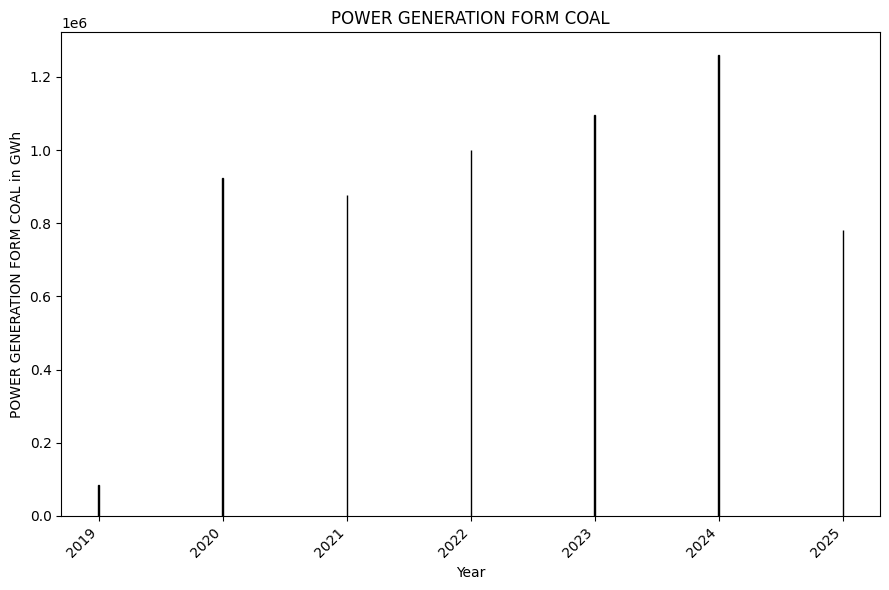

In [80]:
plot.figure(figsize=(9, 6))
plot.bar(ap['yyyymmdd'], ap['India: Coal'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('POWER GENERATION FORM COAL in GWh')
plot.title('POWER GENERATION FORM COAL')
plot.xticks(rotation=45, ha='right')
plot.tight_layout()
plot.show()

In [81]:
ap1=yearly_data[['yyyymmdd','India: Gas']]
# Convert the date column to datetime format
yearly_data['yyyymmdd'] = pd.to_datetime(yearly_data['yyyymmdd'], format='%Y%m%d')

# Extract the year from the date
yearly_data['year'] = yearly_data['yyyymmdd'].dt.year

# Group by the year and sum the values
yearly_sum1 = yearly_data.groupby('year')['India: Gas'].sum().reset_index()

# Rename the columns for clarity
yearly_sum1.columns = ['year', 'total_value']

# Display the resulting DataFrame
yearly_sum1=yearly_sum1.drop(index=range(0,6))

print(yearly_sum1)


    year  total_value
6   2019    43498.000
7   2020    49095.000
8   2021    35266.000
9   2022    22434.000
10  2023    28501.086
11  2024    22945.395


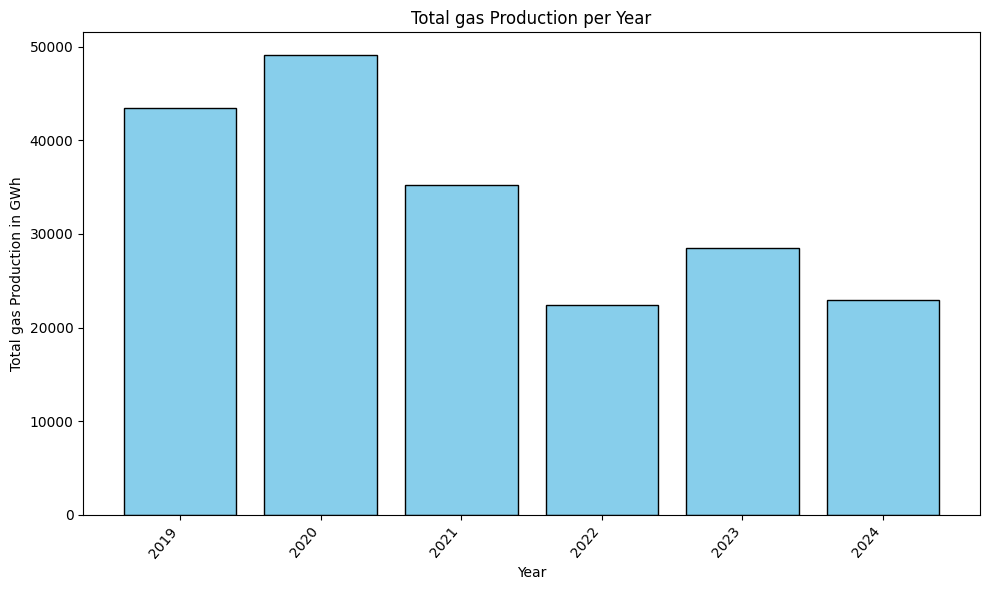

In [82]:

plot.figure(figsize=(10, 6))
plot.bar(yearly_sum1['year'], yearly_sum1['total_value'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total gas Production in GWh')
plot.title('Total gas Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()

In [83]:
hydro =yearly_data[['yyyymmdd','India: Gas']]
hydro=hydro.drop(index=range(0,5))
hydro=hydro.drop(index=11)
print(hydro)


     yyyymmdd  India: Gas
5  2018-12-31   45802.000
6  2019-12-31   43498.000
7  2020-12-31   49095.000
8  2021-12-31   35266.000
9  2022-12-31   22434.000
10 2023-12-31   28501.086


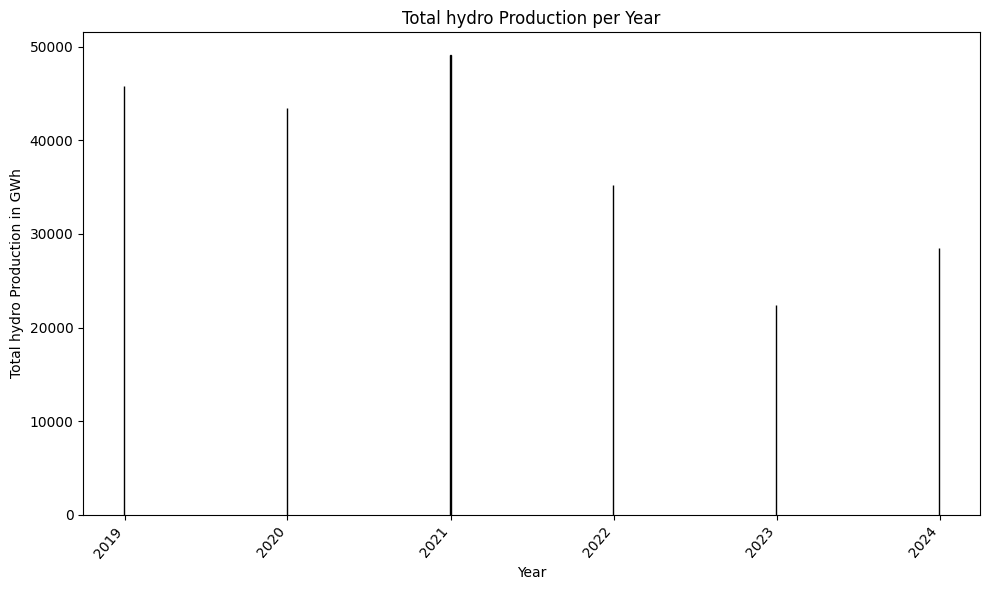

In [84]:
plot.figure(figsize=(10, 6))
plot.bar(hydro['yyyymmdd'], hydro['India: Gas'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total hydro Production in GWh')
plot.title('Total hydro Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()

In [110]:
Windgen = yearly_data[['yyyymmdd','India: WindGen']]
Windgen = Windgen.drop(index=range(0,5))

     yyyymmdd  India: WindGen
5  2018-12-31       56199.000
6  2019-12-31       57428.000
7  2020-12-31       53237.000
8  2021-12-31       64328.000
9  2022-12-31       69223.000
10 2023-12-31       79448.989
11 2024-12-31       46314.673


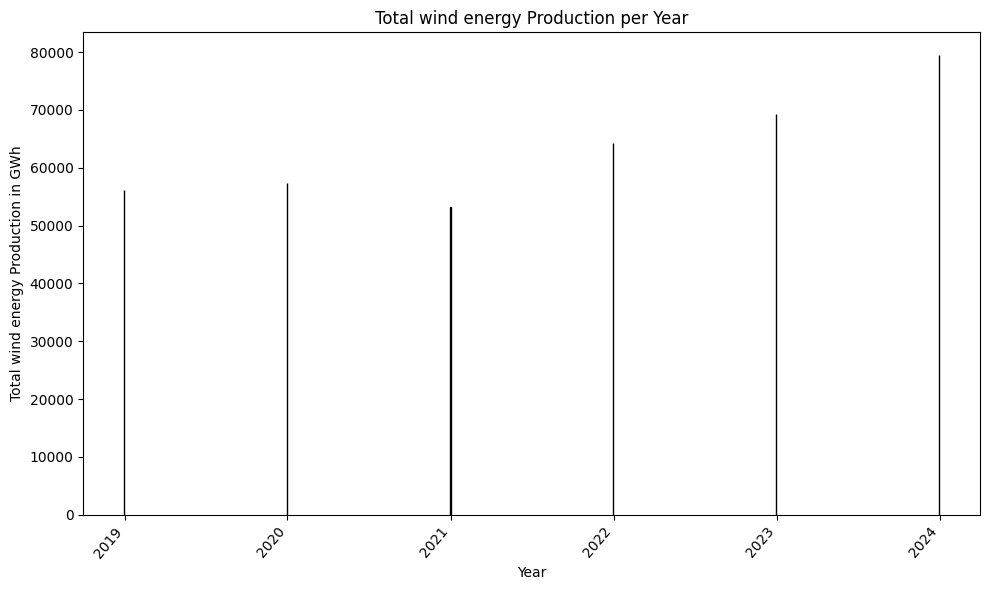

In [111]:

print(Windgen)
Windgen = Windgen.drop(index=11)
plot.figure(figsize=(10, 6))
plot.bar(Windgen['yyyymmdd'], Windgen['India: WindGen'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total wind energy Production in GWh')
plot.title('Total wind energy Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()

In [113]:
solar=yearly_data[['yyyymmdd','India: SolarGen']]

solar=solar.drop(index=range(0,6))
print(solar)
solar=solar.drop(index=11)

     yyyymmdd  India: SolarGen
6  2019-12-31       43219.0000
7  2020-12-31       53054.0000
8  2021-12-31       65292.0000
9  2022-12-31       88956.0000
10 2023-12-31      105399.8670
11 2024-12-31       71647.3789


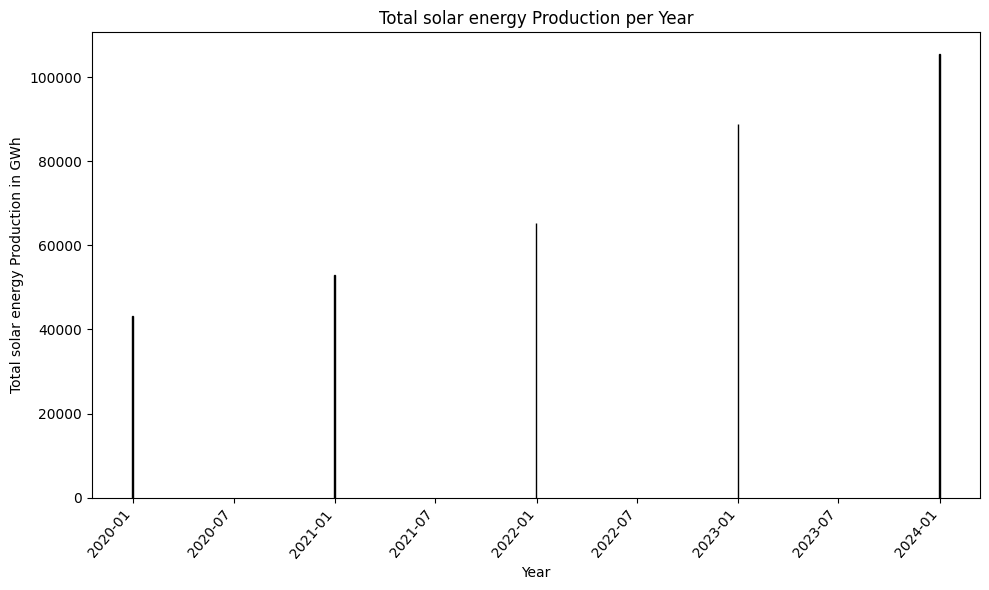

In [114]:
plot.figure(figsize=(10, 6))
plot.bar(solar['yyyymmdd'], solar['India: SolarGen'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total solar energy Production in GWh')
plot.title('Total solar energy Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Coal'], color='royalblue', label='Coal')
plt.plot(df.index, df['Natural gas'], color='lightskyblue', label='Natural gas')
plt.plot(df.index, df['Nuclear'], color='khaki', label='Nuclear')

plt.title("India's Non-Renewable Electricity Production by Source (2014-2024)")
plt.ylabel("TWh/year")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()